In [1]:
rm(list=ls())
getwd() 

[1] "C:/Users/nevin/Downloads/Georgia Tech/Courses/TSA_6402/Project"

In [2]:
setwd("C:/Users/nevin/Downloads/Georgia Tech/Courses/TSA_6402/Project/Kaggle/")
poln1<-read.csv("DekalbwNA.csv", header=T)

In [3]:
# names(poln)
print(dim(poln1))
N=dim(poln1)[1]
head(poln1)

[1] 1949    9


,Date_Local,NO2_AQI,NO2_Mean,O3_AQI,O3_Mean,SO2_AQI,SO2_Mean,CO_AQI,CO_Mean
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,10/1/2010,29,16.833333,41,0.024417,1,0.525000,5,0.279167
2,10/2/2010,43,18.333333,45,0.023500,11,0.929167,6,0.275000
3,10/3/2010,25,9.041667,31,0.024917,16,1.368182,6,0.241667
4,10/4/2010,18,9.833333,23,0.016458,9,0.683333,2,0.170833
5,10/5/2010,37,15.291667,31,0.015667,0,0.308333,3,0.225000
6,10/6/2010,48,21.750000,34,0.015333,1,0.754167,6,0.370833


In [4]:
#Linear imputation
poln1[,2:9]=data.frame(lapply(poln1[,2:9], function(X) approxfun(1:1949, X)(1:1949)))

In [5]:
# Exogenous variable
temp<-read.csv("Dekalbtemp.csv", header=T)

In [6]:
print(dim(temp))
head(temp)

[1] 1949    2


,Date_Local,Temperature
,<fct>,<fct>
1,10/1/2010,64.17
2,10/2/2010,61.13
3,10/3/2010,57.79
4,10/4/2010,53.75
5,10/5/2010,54.08
6,10/6/2010,54.88


In [7]:
#Linear imputation
temp[,2]=approxfun(1:N, temp[,2])(1:N)

In [8]:
ntest=31
n=N-ntest
poln<-poln1[1:n,]
poln_test<-poln1[(n+1):N,]
temp_train<-temp[1:n,2]
temp_test<-temp[(n+1):N,2]

In [9]:
date = as.Date(poln$Date_Local, format="%m/%d/%Y")
month = as.factor(format(date,"%b"))
weekday = as.factor(weekdays(date))
weekend <- grepl("S.+",weekday)

In [10]:
ppmb<-c("NO2_Mean","O3_Mean","SO2_Mean","CO_Mean")
poln_ppmb<-poln[,ppmb]
poln_ppmb.ts=ts(poln_ppmb)

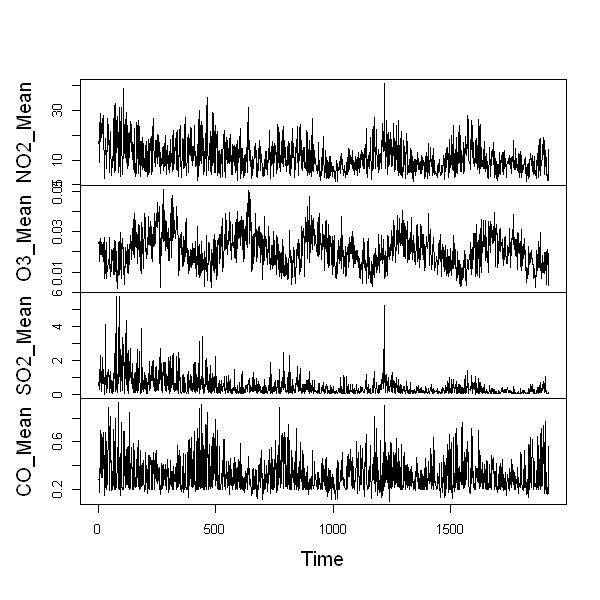

In [11]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)
plot(poln_ppmb.ts, type="l",main="")

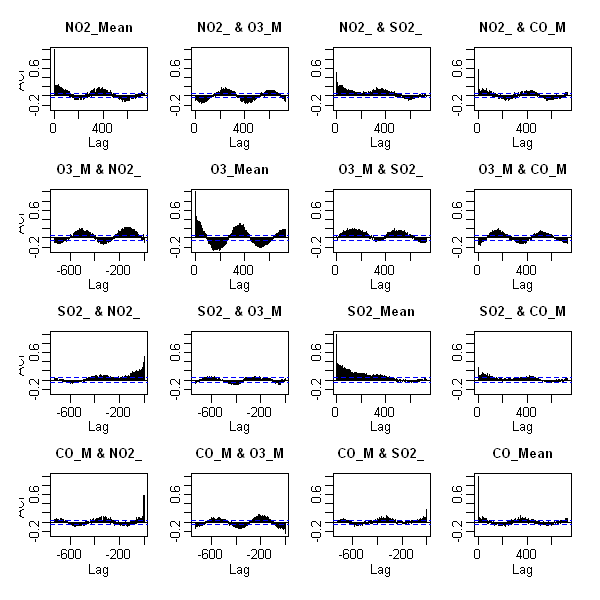

In [12]:
stats::acf(poln_ppmb.ts,lag.max=731)

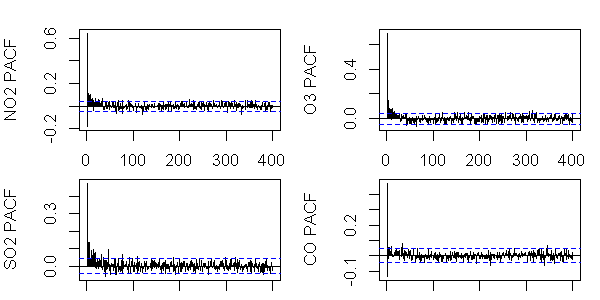

In [13]:
options(repr.plot.width=5, repr.plot.height=2.5)
par(mfrow=c(2,2), mar=c(1,4,1.5,1))
pacf(poln_ppmb.ts[,1], lag.max=400, ylab="NO2 PACF")
pacf(poln_ppmb.ts[,2], lag.max=400, ylab="O3 PACF")
pacf(poln_ppmb.ts[,3], lag.max=400, ylab="SO2 PACF")
pacf(poln_ppmb.ts[,4], lag.max=400, ylab="CO PACF")

In [14]:
dpoln_ppmb.ts=cbind(diff(poln_ppmb.ts[,1]),diff(poln_ppmb.ts[,2]),diff(poln_ppmb.ts[,3]),diff(poln_ppmb.ts[,4]))

In [15]:
library(forecast)
print(ndiffs(poln_ppmb.ts[,1], test='adf'))
print(ndiffs(poln_ppmb.ts[,2], test='adf'))
print(ndiffs(poln_ppmb.ts[,3], test='adf'))
print(ndiffs(poln_ppmb.ts[,4], test='adf'))

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


[1] 0
[1] 0
[1] 0
[1] 0


In [16]:
library(tseries)
print(adf.test(poln_ppmb.ts[,1]))
print(adf.test(poln_ppmb.ts[,2]))
print(adf.test(poln_ppmb.ts[,3]))
print(adf.test(poln_ppmb.ts[,4]))

Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message in adf.test(poln_ppmb.ts[, 1]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 1]
Dickey-Fuller = -8.2413, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 2]
Dickey-Fuller = -5.5608, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 3]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 3]
Dickey-Fuller = -7.8011, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 4]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 4]
Dickey-Fuller = -9.6049, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



In [17]:
n = length(poln_ppmb.ts[,1])
cor(poln_ppmb)
## lag-one correlation
print(cor(poln_ppmb.ts[1:(n-1),1],poln_ppmb.ts[2:n,3]))
print(cor(poln_ppmb.ts[2:n,1],poln_ppmb.ts[1:(n-1),3]))

,NO2_Mean,O3_Mean,SO2_Mean,CO_Mean
NO2_Mean,1.0000000,-0.10152759,0.51770642,0.5722466
O3_Mean,-0.1015276,1.00000000,0.02463314,-0.1417559
SO2_Mean,0.5177064,0.02463314,1.00000000,0.2791025
CO_Mean,0.5722466,-0.14175594,0.27910248,1.0000000


[1] 0.3759883
[1] 0.4329351


In [18]:
time.pts = c(1:(length(poln_ppmb.ts[,1])+ntest))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
pred.time.pts=time.pts[(length(time.pts)-(ntest-1)):length(time.pts)]
time.pts=time.pts[1:(length(time.pts)-ntest)]
x1 = time.pts
x2 = time.pts^2

## Trend + Seasonality

In [19]:
options(repr.plot.width=5, repr.plot.height=3)

##### NO2


Call:
lm(formula = NO2.ts ~ x1 + x2 + weekday + month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8319  -3.3967  -0.5028   2.8601  26.4144 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       15.2666     0.6103  25.013  < 2e-16 ***
x1               -12.7963     1.6680  -7.672 2.70e-14 ***
x2                 7.5030     1.6432   4.566 5.28e-06 ***
weekdayMonday     -1.8408     0.4354  -4.228 2.47e-05 ***
weekdaySaturday   -1.8949     0.4354  -4.352 1.42e-05 ***
weekdaySunday     -3.7773     0.4354  -8.675  < 2e-16 ***
weekdayThursday   -0.6097     0.4354  -1.400  0.16157    
weekdayTuesday    -1.1830     0.4354  -2.717  0.00665 ** 
weekdayWednesday  -0.5070     0.4354  -1.164  0.24442    
monthAug          -0.3417     0.5843  -0.585  0.55876    
monthDec           2.7813     0.5619   4.950 8.09e-07 ***
monthFeb           3.7737     0.5979   6.311 3.44e-10 ***
monthJan           4.2857     0.5840   7.338 3.20e-13 ***
monthJul     

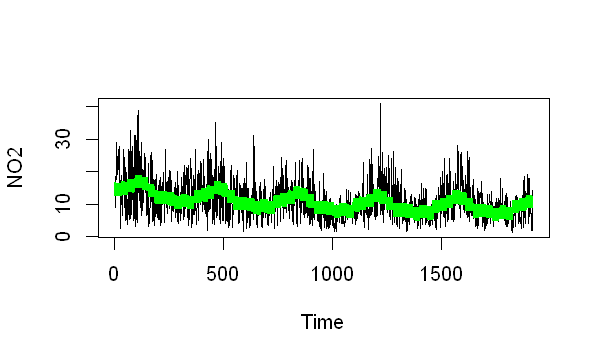

In [20]:
NO2.ts=poln_ppmb.ts[,1]
gam.fit2.NO2 = lm(NO2.ts~x1+x2+weekday+month)
summary(gam.fit2.NO2)

vol.fit.gam2 = fitted(gam.fit2.NO2)
ts.plot(NO2.ts,ylab="NO2")
lines(vol.fit.gam2,lwd=2,col="green")

NO2_tsfit=ts(vol.fit.gam2)
NO2_resid=NO2.ts-vol.fit.gam2

##### O3


Call:
lm(formula = O3.ts ~ x1 + weekday + month)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0240739 -0.0045139 -0.0001283  0.0042504  0.0254662 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.839e-02  6.940e-04  40.910  < 2e-16 ***
x1               -4.968e-03  5.290e-04  -9.393  < 2e-16 ***
weekdayMonday    -3.368e-04  5.581e-04  -0.603 0.546303    
weekdaySaturday   1.159e-03  5.581e-04   2.076 0.038015 *  
weekdaySunday     1.016e-03  5.581e-04   1.821 0.068718 .  
weekdayThursday   1.470e-04  5.581e-04   0.264 0.792189    
weekdayTuesday   -5.381e-04  5.581e-04  -0.964 0.335034    
weekdayWednesday -4.868e-04  5.581e-04  -0.872 0.383115    
monthAug         -2.263e-03  7.489e-04  -3.022 0.002547 ** 
monthDec         -1.279e-02  7.170e-04 -17.845  < 2e-16 ***
monthFeb         -6.244e-03  7.663e-04  -8.148 6.63e-16 ***
monthJan         -1.071e-02  7.485e-04 -14.313  < 2e-16 ***
monthJul         -2.593e-03  7.

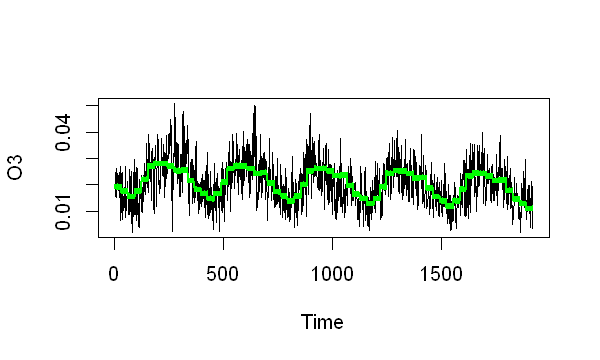

In [21]:
O3.ts=poln_ppmb.ts[,2]
gam.fit2.O3 = lm(O3.ts~x1+weekday+month)
summary(gam.fit2.O3)

vol.fit.gam2 = fitted(gam.fit2.O3)
ts.plot(O3.ts,ylab="O3")
lines(vol.fit.gam2,lwd=2,col="green")

# O3_tsfit=ts(vol.fit.gam2)
O3_resid=O3.ts-vol.fit.gam2

# model1<-lm(O3.ts~x1+weekday+month)
# model2<-lm(O3.ts~x1+month)
# anova(model1, model2) # 0.03094062

##### SO2


Call:
lm(formula = SO2.ts ~ x1 + x2 + weekday + month)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1483 -0.2149 -0.0684  0.1229  4.6739 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.07725    0.05614  19.189  < 2e-16 ***
x1               -2.38771    0.15342 -15.563  < 2e-16 ***
x2                1.59631    0.15114  10.562  < 2e-16 ***
weekdayMonday    -0.11495    0.04005  -2.870  0.00415 ** 
weekdaySaturday  -0.03501    0.04005  -0.874  0.38208    
weekdaySunday    -0.07674    0.04005  -1.916  0.05550 .  
weekdayThursday  -0.02155    0.04005  -0.538  0.59065    
weekdayTuesday   -0.11040    0.04005  -2.757  0.00590 ** 
weekdayWednesday -0.05336    0.04005  -1.332  0.18287    
monthAug          0.05954    0.05374   1.108  0.26805    
monthDec          0.27633    0.05168   5.347 1.00e-07 ***
monthFeb          0.23132    0.05500   4.206 2.72e-05 ***
monthJan          0.42252    0.05372   7.865 6.13e-15 ***
monthJul          0.105

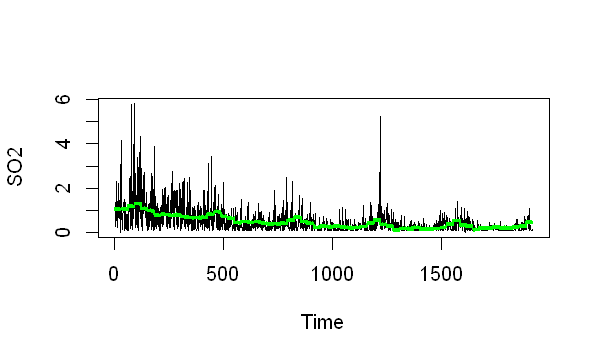

In [22]:
SO2.ts=poln_ppmb.ts[,3]
gam.fit2.SO2 = lm(SO2.ts~x1+x2+weekday+month)
summary(gam.fit2.SO2)

vol.fit.gam2 = fitted(gam.fit2.SO2)
ts.plot(SO2.ts,ylab="SO2")
lines(vol.fit.gam2,lwd=2,col="green")

SO2_tsfit=ts(vol.fit.gam2)
SO2_resid=SO2.ts-vol.fit.gam2

##### CO


Call:
lm(formula = CO.ts ~ x1 + weekday + month)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26888 -0.09298 -0.03002  0.07193  0.54818 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.313901   0.013823  22.708  < 2e-16 ***
x1               -0.036946   0.010535  -3.507 0.000464 ***
weekdayMonday    -0.019169   0.011115  -1.725 0.084750 .  
weekdaySaturday   0.015367   0.011114   1.383 0.166946    
weekdaySunday    -0.007225   0.011115  -0.650 0.515754    
weekdayThursday  -0.013257   0.011115  -1.193 0.233114    
weekdayTuesday   -0.021023   0.011115  -1.891 0.058717 .  
weekdayWednesday -0.017358   0.011115  -1.562 0.118514    
monthAug          0.003747   0.014915   0.251 0.801694    
monthDec          0.082489   0.014280   5.777 8.89e-09 ***
monthFeb          0.049830   0.015263   3.265 0.001115 ** 
monthJan          0.050114   0.014908   3.362 0.000790 ***
monthJul         -0.014654   0.014908  -0.983 0.325758    
month

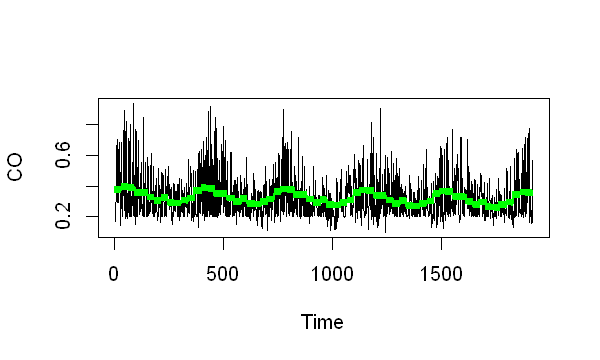

In [23]:
CO.ts=poln_ppmb.ts[,4]
gam.fit2.CO = lm(CO.ts~x1+weekday+month)
summary(gam.fit2.CO)

vol.fit.gam2 = fitted(gam.fit2.CO)
ts.plot(CO.ts,ylab="CO")
lines(vol.fit.gam2,lwd=2,col="green")

CO_tsfit=ts(vol.fit.gam2)
CO_resid=CO.ts-vol.fit.gam2

In [24]:
# Prediction variables
pred.date = as.Date(poln_test$Date_Local, format="%m/%d/%Y")
pred.month = as.factor(format(pred.date,"%b"))
pred.weekday = as.factor(weekdays(pred.date))
pred.input=data.frame(x1=pred.time.pts, x2=pred.time.pts^2, month=pred.month, weekday=pred.weekday)

In [25]:
poln.resid=cbind(NO2_resid,O3_resid,SO2_resid,CO_resid)

In [26]:
# Normalize
min_poln.resid=apply(poln.resid,2,min)
range_poln.resid=apply(poln.resid,2,max)-apply(poln.resid,2,min)

poln.resid=(poln.resid-matrix(min_poln.resid,nrow=n,ncol=length(min_poln.resid),byrow=TRUE))/
            matrix(range_poln.resid,nrow=n,ncol=length(range_poln.resid),byrow=TRUE)

### MTS

In [27]:
library(MTS)

Warning message:
"package 'MTS' was built under R version 3.6.3"

##### Check Granger Causality

In [28]:
library(lmtest)
grangertest(NO2_resid ~ SO2_resid, order = 2, data = poln.resid)
grangertest(CO_resid ~ NO2_resid, order = 2, data = poln.resid)

Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1911,NA,NA,NA
2,1913,-2,9.858484,5.501123e-05


,Res.Df,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
1,1911,NA,NA,NA
2,1913,-2,269.107,1.070403e-103


## VAR on residuals

In [29]:
VARorder(poln.resid,  maxp = 100, output=F)
# selected order: aic =  2 
# selected order: bic =  2 
# selected order: hq =  2

In [30]:
VARmodel<-VAR(poln.resid, p=2, output=F)

In [31]:
pred_VAR<-VARpred(VARmodel, h = ntest)$pred

orig  1918 
Forecasts at origin:  1918 
      NO2_resid O3_resid SO2_resid CO_resid
 [1,]    0.3100   0.4673    0.1659   0.2978
 [2,]    0.3224   0.4757    0.1836   0.3104
 [3,]    0.3339   0.4789    0.1931   0.3219
 [4,]    0.3401   0.4813    0.1963   0.3281
 [5,]    0.3423   0.4830    0.1972   0.3297
 [6,]    0.3428   0.4841    0.1972   0.3295
 [7,]    0.3430   0.4847    0.1972   0.3292
 [8,]    0.3431   0.4850    0.1972   0.3290
 [9,]    0.3432   0.4853    0.1972   0.3290
[10,]    0.3433   0.4854    0.1972   0.3291
[11,]    0.3434   0.4855    0.1973   0.3291
[12,]    0.3434   0.4856    0.1973   0.3291
[13,]    0.3435   0.4856    0.1973   0.3291
[14,]    0.3435   0.4857    0.1973   0.3291
[15,]    0.3435   0.4857    0.1973   0.3291
[16,]    0.3435   0.4857    0.1973   0.3291
[17,]    0.3435   0.4857    0.1973   0.3291
[18,]    0.3435   0.4857    0.1973   0.3291
[19,]    0.3435   0.4857    0.1973   0.3291
[20,]    0.3435   0.4857    0.1973   0.3291
[21,]    0.3435   0.4857    0.1973  

In [32]:
pred_VAR = pred_VAR*matrix(range_poln.resid,nrow=ntest,ncol=length(range_poln.resid),byrow=TRUE)+matrix(min_poln.resid,nrow=ntest,ncol=length(min_poln.resid),byrow=TRUE)

In [33]:
paste("MAPE for VAR")
paste("NO2: ", mean(abs((poln_test$NO2_Mean-pred_VAR[,1]-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3: ", mean(abs((poln_test$O3_Mean-pred_VAR[,2]-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2: ", mean(abs((poln_test$SO2_Mean-pred_VAR[,3]-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO: ", mean(abs((poln_test$CO_Mean-pred_VAR[,4]-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "MAPE for VAR"

[1] "NO2:  0.477897232548698"

[1] "O3:  0.397315246397147"

[1] "SO2:  2.09355146233239"

[1] "CO:  0.402632855328451"

## VARX on residuals

In [34]:
VARXorder(poln.resid, temp_train, maxp = 100, maxm = 10, output = T)

selected order(p,s): aic =  3 9 
selected order(p,s): bic =  2 1 
selected order(p,s): hq =  2 1 


In [35]:
VARXmodel<-VARX(poln.resid, p=2, xt=matrix(temp_train), m=0,, output=F)
# VARXmodel$beta
# VARXmodel$Phi

constant term:  
est:  0.1445 0.1669 0.1378 0.151 
 se:  0.0133 0.0148 0.0102 0.0168 
AR( 1 ) matrix 
          NO2_resid O3_resid SO2_resid CO_resid
NO2_resid     0.738    0.037     0.137   -0.139
O3_resid      0.215    0.530    -0.082    0.022
SO2_resid     0.161    0.016     0.193   -0.044
CO_resid      0.697   -0.158     0.027    0.244
standard errors 
      [,1]  [,2]  [,3]  [,4]
[1,] 0.027 0.021 0.031 0.020
[2,] 0.030 0.023 0.035 0.022
[3,] 0.021 0.016 0.024 0.015
[4,] 0.034 0.027 0.040 0.025
AR( 2 ) matrix 
          NO2_resid O3_resid SO2_resid CO_resid
NO2_resid    -0.174    0.042    -0.031    0.013
O3_resid     -0.003    0.014    -0.069   -0.013
SO2_resid    -0.096    0.009     0.071   -0.013
CO_resid     -0.297    0.087    -0.097    0.017
standard errors 
      [,1]  [,2]  [,3]  [,4]
[1,] 0.029 0.021 0.032 0.019
[2,] 0.032 0.023 0.035 0.021
[3,] 0.022 0.016 0.024 0.014
[4,] 0.037 0.026 0.040 0.024
Coefficients of exogenous 
lag- 0  coefficient matrix 
NO2_resid  O3_resid SO2

In [36]:
pred_VARX<-VARXpred(VARXmodel, newxt=matrix(temp_test), hstep = ntest)$pred

Prediction at origin:  1918 
Point forecasts (starting with step 1):  
      NO2_resid O3_resid SO2_resid CO_resid
 [1,]   0.31858  0.46142   0.17193  0.29558
 [2,]   0.33914  0.46728   0.19287  0.31447
 [3,]   0.35355  0.47089   0.20308  0.33024
 [4,]   0.36092  0.47295   0.20690  0.33624
 [5,]   0.36516  0.47351   0.20884  0.33755
 [6,]   0.36649  0.47471   0.20889  0.33867
 [7,]   0.36069  0.47957   0.20463  0.33982
 [8,]   0.35570  0.48125   0.20279  0.33489
 [9,]   0.35432  0.48116   0.20247  0.33236
[10,]   0.35817  0.47853   0.20528  0.33160
[11,]   0.36426  0.47596   0.20844  0.33430
[12,]   0.36649  0.47640   0.20874  0.33837
[13,]   0.36624  0.47698   0.20846  0.33861
[14,]   0.36507  0.47761   0.20769  0.33796
[15,]   0.36262  0.47891   0.20622  0.33745
[16,]   0.35834  0.48107   0.20379  0.33651
[17,]   0.35963  0.47882   0.20572  0.33284
[18,]   0.36457  0.47624   0.20838  0.33432
[19,]   0.36817  0.47541   0.20985  0.33769
[20,]   0.36867  0.47601   0.20965  0.33947
[21,]

In [37]:
pred_VARX = pred_VARX*matrix(range_poln.resid,nrow=ntest,ncol=length(range_poln.resid),byrow=TRUE)+matrix(min_poln.resid,nrow=ntest,ncol=length(min_poln.resid),byrow=TRUE)

In [38]:
paste("MAPE for VARX")
paste("NO2: ", mean(abs((poln_test$NO2_Mean-pred_VARX[,1]-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3: ", mean(abs((poln_test$O3_Mean-pred_VARX[,2]-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2: ", mean(abs((poln_test$SO2_Mean-pred_VARX[,3]-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO: ", mean(abs((poln_test$CO_Mean-pred_VARX[,4]-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "MAPE for VARX"

[1] "NO2:  0.504475474824026"

[1] "O3:  0.4000884973614"

[1] "SO2:  2.31225533614493"

[1] "CO:  0.411616547296058"

## VARMA

In [39]:
VARMAmodel<-VARMACpp(poln.resid, p=2, q=2)

Number of parameters:  68 
initial estimates:  0.0812 -0.0638 0.2999 0.4292 1.2426 0.4002 0.2821 -0.6098 -0.3094 -0.2443 -0.2253 0.1691 1.5863 0.7758 0.3108 -0.3435 -0.6545 -0.2324 -0.5371 0.3741 -0.4237 -0.138 -0.1028 -0.279 0.219 0.1463 0.5753 -0.1141 1.8107 -1.102 -1.4705 -0.0227 -0.4539 0.4012 0.1444 0.1319 -0.5049 -0.364 -0.1353 0.4691 -0.0111 0.004 0.1421 0.024 -1.3774 -0.251 -0.3918 0.3658 -0.2361 -0.0187 0.2283 -0.0786 0.5876 0.1582 0.2972 0.2404 0.3729 -0.0553 -0.3768 0.0499 -1.1126 0.9457 1.508 0.2808 -0.0234 0.1664 -0.1888 0.0346 
Par. lower-bounds:  -0.2016 -0.377 0.0843 0.0747 -0.5927 -0.9174 -0.8217 -1.3581 -0.8837 -0.8407 -0.9355 -0.2786 -0.4475 -0.6843 -0.9123 -1.1728 -1.291 -0.8933 -1.3241 -0.122 -1.8234 -1.1428 -0.9446 -0.8498 -0.219 -0.3085 0.0336 -0.4555 -0.4903 -2.7539 -2.8543 -0.9609 -1.1739 -0.3465 -0.746 -0.4293 -2.3413 -1.6817 -1.241 -0.2797 -0.3164 -0.0952 -0.3141 -0.1518 -3.4122 -1.7113 -1.617 -0.4639 -0.5744 -0.1287 -0.2772 -0.2734 -0.8129 -0.8468 -0.546 -0.

In [40]:
pred_VARMA<-VARMApred(VARMAmodel, h = ntest)$pred

Predictions at origin  1918 
      NO2_resid O3_resid SO2_resid CO_resid
 [1,]    0.3054   0.4821    0.1441   0.2739
 [2,]    0.3302   0.4835    0.1906   0.3312
 [3,]    0.3384   0.4937    0.1703   0.3183
 [4,]    0.3461   0.4927    0.1970   0.3555
 [5,]    0.3373   0.4979    0.1739   0.3261
 [6,]    0.3380   0.4857    0.2001   0.3442
 [7,]    0.3322   0.4853    0.1826   0.3188
 [8,]    0.3352   0.4741    0.2054   0.3358
 [9,]    0.3320   0.4751    0.1901   0.3164
[10,]    0.3355   0.4676    0.2085   0.3320
[11,]    0.3335   0.4705    0.1946   0.3165
[12,]    0.3369   0.4660    0.2093   0.3304
[13,]    0.3355   0.4700    0.1969   0.3177
[14,]    0.3386   0.4674    0.2087   0.3298
[15,]    0.3374   0.4718    0.1977   0.3194
[16,]    0.3401   0.4703    0.2073   0.3298
[17,]    0.3392   0.4745    0.1978   0.3212
[18,]    0.3415   0.4737    0.2057   0.3301
[19,]    0.3407   0.4776    0.1975   0.3229
[20,]    0.3426   0.4770    0.2040   0.3304
[21,]    0.3419   0.4804    0.1970   0.3244
[22

In [41]:
pred_VARMA = pred_VARMA*matrix(range_poln.resid,nrow=ntest,ncol=length(range_poln.resid),byrow=TRUE)+matrix(min_poln.resid,nrow=ntest,ncol=length(min_poln.resid),byrow=TRUE)

In [42]:
paste("MAPE for VARMA")
paste("NO2: ", mean(abs((poln_test$NO2_Mean-pred_VARMA[,1]-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3: ", mean(abs((poln_test$O3_Mean-pred_VARMA[,2]-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2: ", mean(abs((poln_test$SO2_Mean-pred_VARMA[,3]-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO: ", mean(abs((poln_test$CO_Mean-pred_VARMA[,4]-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "MAPE for VARMA"

[1] "NO2:  0.47001679966576"

[1] "O3:  0.394061721864025"

[1] "SO2:  2.07442353162894"

[1] "CO:  0.40141739177351"

## Multivariate GARCH

In [43]:
library(rmgarch)

Warning message:
"package 'rmgarch' was built under R version 3.6.3"Loading required package: rugarch
Warning message:
"package 'rugarch' was built under R version 3.6.3"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



In [44]:
mgarchspec<-gogarchspec(mean.model = list(model = c("VAR"), robust = FALSE, lag = 4, robust = TRUE,
            external.regressors = NULL),
            variance.model = list(model = "sGARCH", garchOrder = c(1,1), submodel = NULL, variance.targeting = FALSE))

In [45]:
mgarchfit<-gogarchfit(mgarchspec, poln.resid)

In [46]:
mgarchforecast<-fitted(gogarchforecast(mgarchfit, n.ahead = ntest))[,,1]
mgarchforecast<-mgarchforecast*matrix(range_poln.resid,nrow=ntest,ncol=length(range_poln.resid),byrow=TRUE)+matrix(min_poln.resid,nrow=ntest,ncol=length(min_poln.resid),byrow=TRUE)

In [47]:
mgarchsigma<-sigma(gogarchforecast(mgarchfit, n.ahead = ntest))[,,1]

In [48]:
paste("MAPE for M-GARCH")
paste("NO2: ", mean(abs((poln_test$NO2_Mean-mgarchforecast[,1]-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3: ", mean(abs((poln_test$O3_Mean-mgarchforecast[,2]-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2: ", mean(abs((poln_test$SO2_Mean-mgarchforecast[,3]-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO: ", mean(abs((poln_test$CO_Mean-mgarchforecast[,4]-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "MAPE for M-GARCH"

[1] "NO2:  0.456839509468176"

[1] "O3:  0.395415788079797"

[1] "SO2:  1.59406394801773"

[1] "CO:  0.382093771264275"

## Multivariate GARCH with exogenous variable (temperature)

In [49]:
mgarchspecX<-gogarchspec(mean.model = list(model = c("VAR"), robust = FALSE, lag = 5, robust = TRUE,
            external.regressors = matrix(temp_train)),
            variance.model = list(model = "sGARCH", garchOrder = c(1,1), submodel = NULL, variance.targeting = FALSE))

In [50]:
mgarchfitX<-gogarchfit(mgarchspecX, poln.resid)

In [51]:
mgarchXforecast<-fitted(gogarchforecast(mgarchfitX, n.ahead = ntest, external.forecasts = list(mregfor = matrix(temp_train))))[,,1]
mgarchXforecast<-mgarchXforecast*matrix(range_poln.resid,nrow=ntest,ncol=length(range_poln.resid),byrow=TRUE)+matrix(min_poln.resid,nrow=ntest,ncol=length(min_poln.resid),byrow=TRUE)

In [52]:
paste("MAPE for M-GARCHX")
paste("NO2: ", mean(abs((poln_test$NO2_Mean-mgarchXforecast[,1]-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3: ", mean(abs((poln_test$O3_Mean-mgarchXforecast[,2]-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2: ", mean(abs((poln_test$SO2_Mean-mgarchXforecast[,3]-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO: ", mean(abs((poln_test$CO_Mean-mgarchXforecast[,4]-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "MAPE for M-GARCHX"

[1] "NO2:  0.467439293029305"

[1] "O3:  0.393812942459392"

[1] "SO2:  1.60098725330824"

[1] "CO:  0.372710932407938"

### Forecast

In [53]:
armaforecast<-read.csv("arma_pred.csv", header=T)
armaXforecast<-read.csv("armaX_pred.csv", header=T)

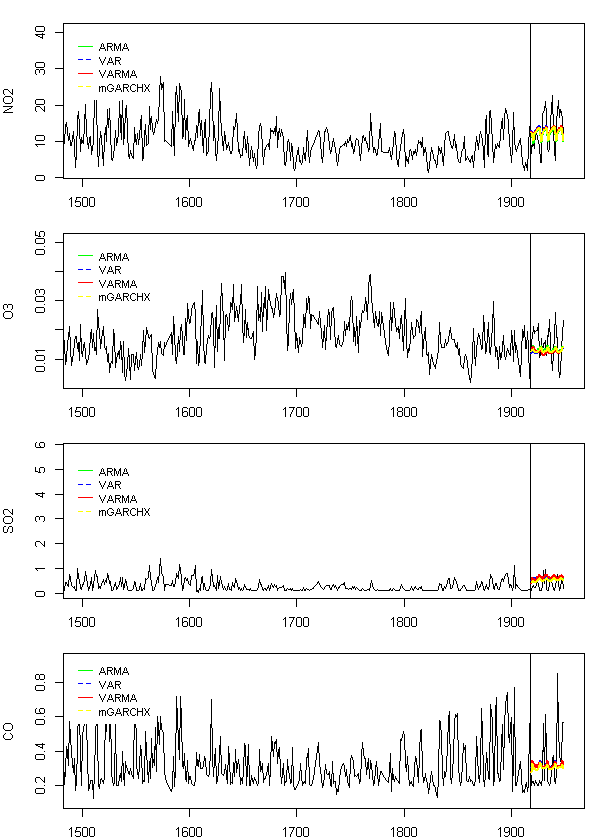

In [54]:
options(repr.plot.width=5, repr.plot.height=7)
par(mfrow=c(4,1), mar=c(2,4,1.5,1))
plot(1:N,ts(poln1[1:N,3]),type='l',xlim=c(1500,1950),ylab="NO2")
abline(v=1918)
lines((n+1):N,armaforecast[,1]+predict(gam.fit2.NO2,pred.input),col="green",lwd=2,type='l')
lines((n+1):N,pred_VAR[,1]+predict(gam.fit2.NO2,pred.input),col="blue",lwd=2,type='l')
lines((n+1):N,pred_VARMA[,1]+predict(gam.fit2.NO2,pred.input),col="red",lwd=2,type='l')
lines((n+1):N,mgarchXforecast[,1]+predict(gam.fit2.NO2,pred.input),col="yellow",lwd=2,type='l')
legend(1490, 40, legend=c("ARMA", "VAR", "VARMA", "mGARCHX"), col=c("green", "blue", "red", "yellow"), lty=1:2, cex=0.8,box.lty=0)

plot(1:N,ts(poln1[1:N,5]),type='l',xlim=c(1500,1950),ylab="O3")
abline(v=1918)
lines((n+1):N,armaforecast[,2]+predict(gam.fit2.O3,pred.input),col="green",lwd=2,type='l')
lines((n+1):N,pred_VAR[,2]+predict(gam.fit2.O3,pred.input),col="blue",lwd=2,type='l')
lines((n+1):N,pred_VARMA[,2]+predict(gam.fit2.O3,pred.input),col="red",lwd=2,type='l')
lines((n+1):N,mgarchXforecast[,2]+predict(gam.fit2.O3,pred.input),col="yellow",lwd=2,type='l')
legend(1490, 0.05, legend=c("ARMA", "VAR", "VARMA", "mGARCHX"), col=c("green", "blue", "red", "yellow"), lty=1:2, cex=0.8,box.lty=0)

plot(1:N,ts(poln1[1:N,7]),type='l',xlim=c(1500,1950),ylab="SO2")
abline(v=1918)
lines((n+1):N,armaforecast[,3]+predict(gam.fit2.SO2,pred.input),col="green",lwd=2,type='l')
lines((n+1):N,pred_VAR[,3]+predict(gam.fit2.SO2,pred.input),col="blue",lwd=2,type='l')
lines((n+1):N,pred_VARMA[,3]+predict(gam.fit2.SO2,pred.input),col="red",lwd=2,type='l')
lines((n+1):N,mgarchXforecast[,3]+predict(gam.fit2.SO2,pred.input),col="yellow",lwd=2,type='l')
legend(1490, 5.5, legend=c("ARMA", "VAR", "VARMA", "mGARCHX"), col=c("green", "blue", "red", "yellow"), lty=1:2, cex=0.8,box.lty=0)

plot(1:N,ts(poln1[1:N,9]),type='l',xlim=c(1500,1950),ylab="CO")
abline(v=1918)
lines((n+1):N,armaforecast[,4]+predict(gam.fit2.CO,pred.input),col="green",lwd=2,type='l')
lines((n+1):N,pred_VAR[,4]+predict(gam.fit2.CO,pred.input),col="blue",lwd=2,type='l')
lines((n+1):N,pred_VARMA[,4]+predict(gam.fit2.CO,pred.input),col="red",lwd=2,type='l')
lines((n+1):N,mgarchXforecast[,4]+predict(gam.fit2.CO,pred.input),col="yellow",lwd=2,type='l')
legend(1490, 0.95, legend=c("ARMA", "VAR", "VARMA", "mGARCHX"), col=c("green", "blue", "red", "yellow"), lty=1:2, cex=0.8,box.lty=0)